In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# loading the dataset
wine_dataset = pd.read_csv('D:\Kaggle\Classification\Vine\winequality-red.csv')

In [3]:
#size of data
wine_dataset.shape

(1599, 12)

In [4]:
#frist five row of data
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# checking for missing values
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# statistical measures of data
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


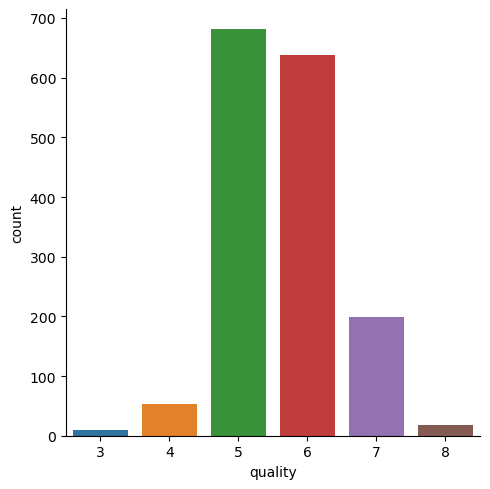

In [7]:
# number of values for each quality
sns.catplot(x='quality', data = wine_dataset, kind = 'count')

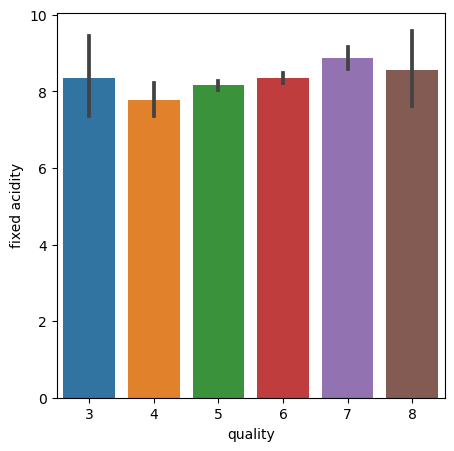

In [8]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'fixed acidity', data = wine_dataset)
plt.show()

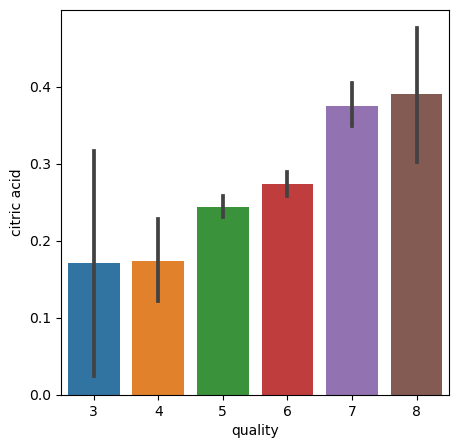

In [9]:
# volatile acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = wine_dataset)
plt.show()

## Correlation

# Positive Correlation:
## Positive correlation is a relationship between two variables where both variables move in the same direction. This means that when one variable increases, the other variable also tends to increase. Similarly, when one variable decreases, the other variable tends to decrease. For example, there is a positive correlation between the amount of study time and exam scores, as students who study more tend to score higher on exams.

## The strength of the positive correlation is measured by the correlation coefficient, which ranges from +1 (perfect positive correlation) to 0 (no correlation) to -1 (perfect negative correlation). A correlation coefficient of +1 indicates that the two variables move perfectly together in a positive direction, while a coefficient of 0 indicates no correlation between the variables.

# Negative Correlation:
## Negative correlation is a relationship between two variables where the variables move in opposite directions. This means that when one variable increases, the other variable tends to decrease. Similarly, when one variable decreases, the other variable tends to increase. For example, there is a negative correlation between the amount of exercise and body weight, as people who exercise more tend to weigh less.

## The strength of the negative correlation is also measured by the correlation coefficient, which ranges from -1 (perfect negative correlation) to 0 (no correlation) to +1 (perfect positive correlation). A correlation coefficient of -1 indicates that the two variables move perfectly together in a negative direction, while a coefficient of 0 indicates no correlation between the variables.

## In both cases, correlation does not necessarily imply causation, as there may be other factors that affect the relationship between the variables. Additionally, it is important to consider other statistical measures and context when interpreting correlation coefficients.

In [10]:
correlation = wine_dataset.corr()

In [11]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

<AxesSubplot:>

# Data Preprocessing

In [12]:
# separate the data and Label
X = wine_dataset.drop('quality',axis=1)

In [13]:
# Label Binarizaton
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

# Model Training: RandomForest

In [15]:
model = RandomForestClassifier()

In [16]:
model.fit(X_train, Y_train)

RandomForestClassifier()

In [17]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [18]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.934375


# Building a Predictive System

In [19]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
    print('Good Quality Wine')
else:
    print('Bad Quality Wine')

[0]
Bad Quality Wine


D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
